# China's One Child Policy

At what point are there too many men?


In [317]:
%matplotlib inline

from modsim import *

In [318]:
import pandas as pd
data = pd.read_csv("C:/Users/rwon/Documents/ModSim/Lots_o_data.csv",  index_col='Year', low_memory=False) / 1e8
data

,Population
Year,
1965,7.15185
1966,7.35400
1967,7.54550
1968,7.74510
1969,7.96025
1970,8.18315
1971,8.41105
1972,8.62030
1973,8.81940


In [357]:
system = System(death_rate = 17.06/1000,
                old_pop0 = 7.15185/2,
                young_pop0 = 7.15185/2,
                youngMale0 = 7.15185/4,
                youngFemale0 = 7.15185/4,
                oldMale0 = 7.15185/4,
                oldFemale0 = 7.15185/4,
                fertilityRate1 = 1.6,
                fertilityRate2 = 1,
                maturationRate = .03,
                percentOfBeingBoy1 = 0.55,
                percentOfBeingBoy2 = 0.75,
                percentOfWomanHavingBabies = 0.03) 

systemSingle = System(t0 = 1965, 
                      t_end = 2050)
system

,value
death_rate,0.017060
old_pop0,3.575925
young_pop0,3.575925
youngMale0,1.787962
youngFemale0,1.787962
oldMale0,1.787962
oldFemale0,1.787962
fertilityRate1,1.600000
fertilityRate2,1.000000
maturationRate,0.030000


In [358]:
systemSingle

,value
t0,1965
t_end,2050


In [359]:
def run_simulation(system):
    youngMale = TimeSeries()
    youngFemale = TimeSeries()
    youngTotal = TimeSeries()
    oldMale = TimeSeries()
    oldFemale = TimeSeries()
    oldTotal = TimeSeries()
    population = TimeSeries()

    oldTotal[systemSingle.t0] = system.old_pop0
    youngTotal[systemSingle.t0] = system.young_pop0
    youngMale[systemSingle.t0] = system.youngMale0
    youngFemale[systemSingle.t0] = system.youngFemale0
    oldMale[systemSingle.t0] = system.oldMale0
    oldFemale[systemSingle.t0] = system.oldFemale0
    population[systemSingle.t0] = system.old_pop0 + system.young_pop0
    
    
    for t in range(systemSingle.t0, systemSingle.t_end):
            
            if t < 1980:

                babiesNextYear = oldFemale[t] * system.percentOfWomanHavingBabies * system.fertilityRate1

                youngFemale[t+1] = youngFemale[t] + babiesNextYear*(1-system.percentOfBeingBoy1)
                youngMale[t+1] = youngMale[t] + babiesNextYear*system.percentOfBeingBoy1
                
                maturingBabies = youngTotal[t] * system.maturationRate

                youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] - maturingBabies

                deaths = system.death_rate * oldTotal[t]
                genderDeath = deaths / 2 

                oldFemale[t+1] = maturingBabies / 2 + oldFemale[t] - genderDeath
                oldMale[t+1] = maturingBabies / 2 + oldMale[t] - genderDeath

                oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]

                population[t+1] = youngTotal[t+1] + oldTotal[t+1]
                if population [t+1] < 0:
                    population[t+1] = 0
            
            else:
                babiesNextYear = oldFemale[t] * system.percentOfWomanHavingBabies * system.fertilityRate2

                youngFemale[t+1] = youngFemale[t] + babiesNextYear*(1-system.percentOfBeingBoy2)
                youngMale[t+1] = youngMale[t] + babiesNextYear*system.percentOfBeingBoy2

                maturingBabies = youngTotal[t] * system.maturationRate

                youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] - maturingBabies

                deaths = system.death_rate * oldTotal[t]
                genderDeath = deaths / 2 

                oldFemale[t+1] = maturingBabies / 2 + oldFemale[t] - genderDeath
                oldMale[t+1] = maturingBabies / 2 + oldMale[t] - genderDeath

                oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]

                population[t+1] = youngTotal[t+1] + oldTotal[t+1]
                if population [t+1] < 0:
                    population[t+1] = 0
            

    system.population = population
    system.youngTotal = youngTotal
    system.oldMale = oldMale
    system.oldFemale = oldFemale
    system.oldTotal = oldTotal


Test your changes in `run_simulation`:

In [360]:
run_simulation(system)
system.youngTotal

,value
1965,3.575925
1966,3.554469
1967,3.642046
1968,3.727427
1969,3.813996
1970,3.901692
1971,3.990559
1972,4.080640
1973,4.171976
1974,4.264607


In [361]:
system.oldMale

,value
1965,1.787962
1966,1.811099
1967,1.833518
1968,1.856869
1969,1.881103
1970,1.906221
1971,1.932226
1972,1.959121
1973,1.986908
1974,2.015591


In [362]:
system.oldFemale

,value
1965,1.787962
1966,1.811099
1967,1.833518
1968,1.856869
1969,1.881103
1970,1.906221
1971,1.932226
1972,1.959121
1973,1.986908
1974,2.015591


In [363]:
system.oldTotal

,value
1965,3.575925
1966,3.622197
1967,3.667037
1968,3.713739
1969,3.762205
1970,3.812442
1971,3.864452
1972,3.918241
1973,3.973815
1974,4.031181


In [364]:
system.population

,value
1965,7.151850
1966,7.176667
1967,7.309083
1968,7.441166
1969,7.576201
1970,7.714133
1971,7.855012
1972,7.998882
1973,8.145791
1974,8.295788


In [365]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(data, '--', color='green', label='China Population')
    plot(system.population, 'bo-', label='population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)


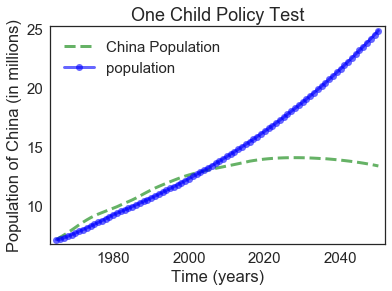

In [366]:
plot_results(system, title='One Child Policy Test')

In [307]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(data, '--', color='green', label='China Population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)

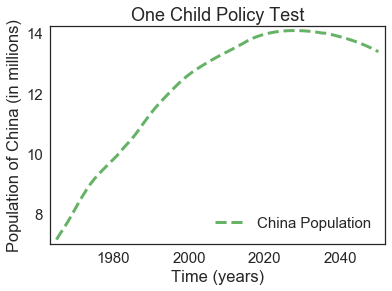

In [121]:
plot_results(data, title='One Child Policy Test')